In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [32]:
df = pd.read_csv("data/titanik.csv")

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True)

In [35]:
train_df = train_df.copy()
test_df = test_df.copy()

In [36]:
columns_to_drop = ["PassengerId", "Name"]

In [37]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [38]:
TARGET = "Survived"

In [39]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
544,0,1,male,50.00,1,0,PC 17761,106.4250,C86,C
644,1,3,female,0.75,2,1,2666,19.2583,NaN,C
402,0,3,female,21.00,1,0,4137,9.8250,NaN,S
876,0,3,male,20.00,0,0,7534,9.8458,NaN,S
715,0,3,male,19.00,0,0,348124,7.6500,F G73,S


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 544 to 66
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       579 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     171 non-null    object 
 9   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


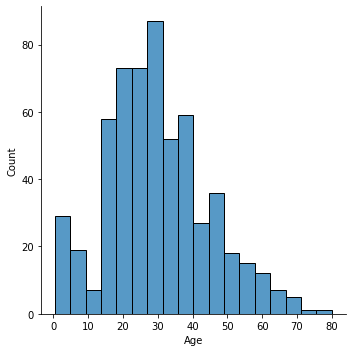

In [41]:
sns.displot(train_df["Age"])

In [42]:
train_df["Child"] = train_df["Age"] < 8
test_df["Child"] = test_df["Age"] < 8

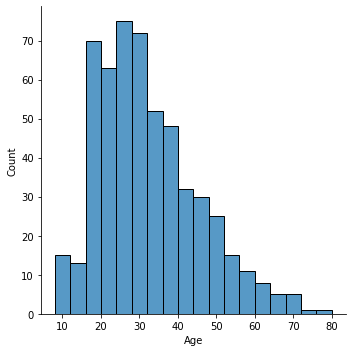

In [43]:
sns.displot(train_df.loc[~train_df["Child"], "Age"])

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

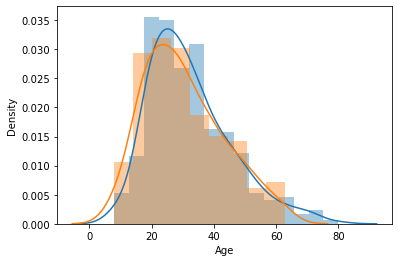

In [44]:
sns.distplot(train_df.loc[(~train_df["Child"]) & (train_df["Sex"] == "male"), "Age"])
sns.distplot(train_df.loc[(~train_df["Child"]) & (train_df["Sex"] == "female"), "Age"])

In [45]:
mean_age = train_df["Age"].mean()

In [46]:
train_df["Age"].fillna(mean_age, inplace=True)
test_df["Age"].fillna(mean_age, inplace=True)

In [47]:
train_df["Embarked"].value_counts()

S    521
C    133
Q     56
Name: Embarked, dtype: int64

In [48]:
train_df["Pclass"].value_counts()

3    387
1    179
2    146
Name: Pclass, dtype: int64

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

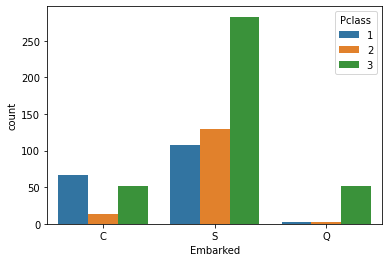

In [49]:
sns.countplot(train_df["Embarked"], hue=train_df["Pclass"])

In [50]:
train_df.loc[train_df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
829,1,1,female,62.0,0,0,113572,80.0,B28,NaN,False
61,1,1,female,38.0,0,0,113572,80.0,B28,NaN,False


In [51]:
train_df["Embarked"].fillna("S", inplace=True)

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ticket', ylabel='count'>

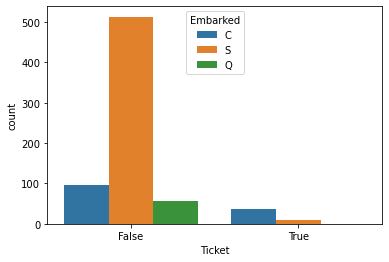

In [54]:
sns.countplot(train_df["Ticket"].str.startswith("PC"), hue=train_df["Embarked"])

In [55]:
train_df["PC_ticket"] = train_df["Ticket"].str.startswith("PC")
test_df["PC_ticket"] = test_df["Ticket"].str.startswith("PC")

In [56]:
train_df.drop(columns=["Cabin", "Ticket"], inplace=True)
test_df.drop(columns=["Cabin", "Ticket"], inplace=True)

In [57]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,PC_ticket
544,0,1,male,50.00,1,0,106.4250,C,False,True
644,1,3,female,0.75,2,1,19.2583,C,True,False
402,0,3,female,21.00,1,0,9.8250,S,False,False
876,0,3,male,20.00,0,0,9.8458,S,False,False
715,0,3,male,19.00,0,0,7.6500,S,False,False


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [69]:
transformer = ColumnTransformer(
    [
        ("binary_cols", MinMaxScaler(), ["Child", "PC_ticket"]),
        ("real_cols", StandardScaler(), ["Age", "Fare"]),
        ("categorical_cols", OneHotEncoder(handle_unknown="ignore"), ["Pclass", "SibSp", "Sex", "Parch", "Embarked"])
    ]
)

In [77]:
transformer.fit(train_df)

ColumnTransformer(transformers=[('binary_cols', MinMaxScaler(),
                                 ['Child', 'PC_ticket']),
                                ('real_cols', StandardScaler(),
                                 ['Age', 'Fare']),
                                ('categorical_cols',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'SibSp', 'Sex', 'Parch',
                                  'Embarked'])])

In [78]:
transformer.transform(train_df)

array([[ 0.        ,  1.        ,  1.54430698, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -2.22298095, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.67399454, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        , -0.06204929, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.85586858, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -0.06204929, ...,  0.        ,
         0.        ,  1.        ]])

In [127]:
pipeline = Pipeline(
    [
        ("transformer", transformer),
        ("model", LogisticRegression(
            penalty="elasticnet", 
            C=1,
            l1_ratio=0.1, 
            solver="saga"))
    ]
)

In [128]:
pipeline.fit(train_df.drop(columns=[TARGET]), train_df[TARGET])

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('binary_cols', MinMaxScaler(),
                                                  ['Child', 'PC_ticket']),
                                                 ('real_cols', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'SibSp', 'Sex',
                                                   'Parch', 'Embarked'])])),
                ('model',
                 LogisticRegression(C=1, l1_ratio=0.1, penalty='elasticnet',
                                    solver='saga'))])

In [129]:
predictions = pipeline.predict(test_df.drop(columns=[TARGET]))

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [131]:
accuracy_score(test_df[TARGET], predictions)

0.8156424581005587

In [132]:
confusion_matrix(test_df[TARGET], predictions)

array([[93, 15],
       [18, 53]])